## Part 1: Data preprocessing

Dataset link: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv

### Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

### Data Exploration

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [7]:
len(dataset.select_dtypes(include='object').columns)

3

In [8]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

11

In [10]:
# statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Dealing with missing data

In [11]:
dataset.isnull().values.any()

False

In [12]:
dataset.isnull().values.sum()

0

### Encode the categorical data

In [13]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [14]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
dataset = dataset.drop(columns =['RowNumber', 'CustomerId','Surname'])

In [16]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [18]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
dataset.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [21]:
dataset.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [22]:
#One Hot Encoding
dataset = pd.get_dummies(dataset, drop_first=True)

In [23]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


/Users/neekhilkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

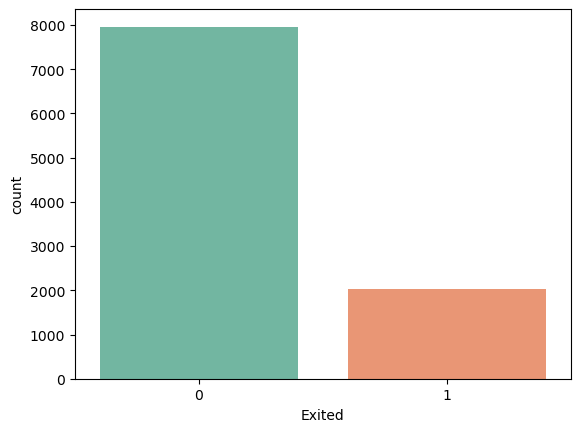

In [24]:
sns.countplot(dataset['Exited'], palette="Set2")
plt.plot

In [25]:
#Staying with Bank
(dataset.Exited == 0).sum()

7963

In [26]:
#Existed Customer
(dataset.Exited == 1).sum()

2037

### Correlation matrix and heatmap

In [27]:
dataset_2 = dataset.drop(columns=['Exited'])

In [28]:
dataset_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


<AxesSubplot:title={'center':'Corelated with Exited'}>

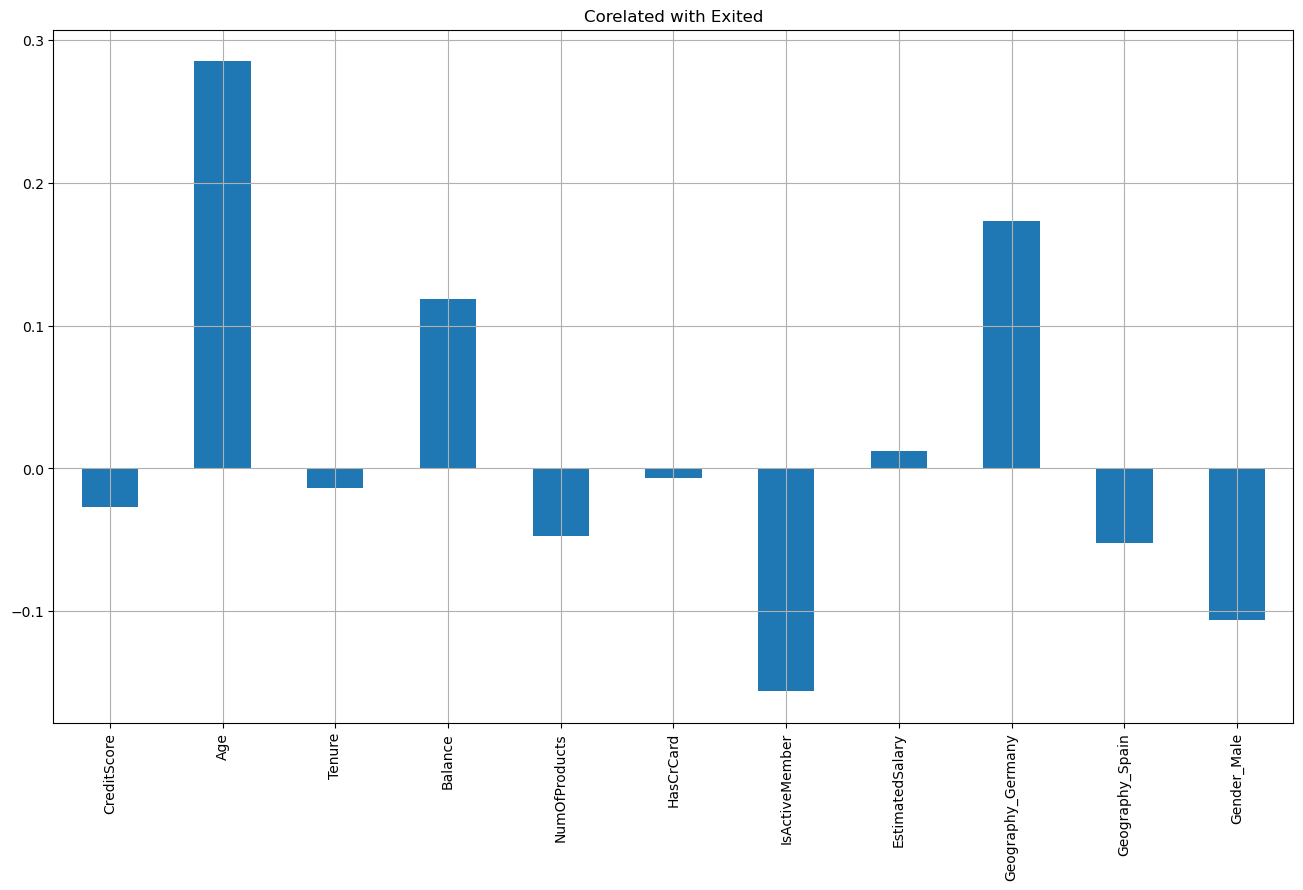

In [29]:
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(16,9), title='Corelated with Exited', rot=90, grid=True)

In [30]:
corr = dataset.corr()

<AxesSubplot:>

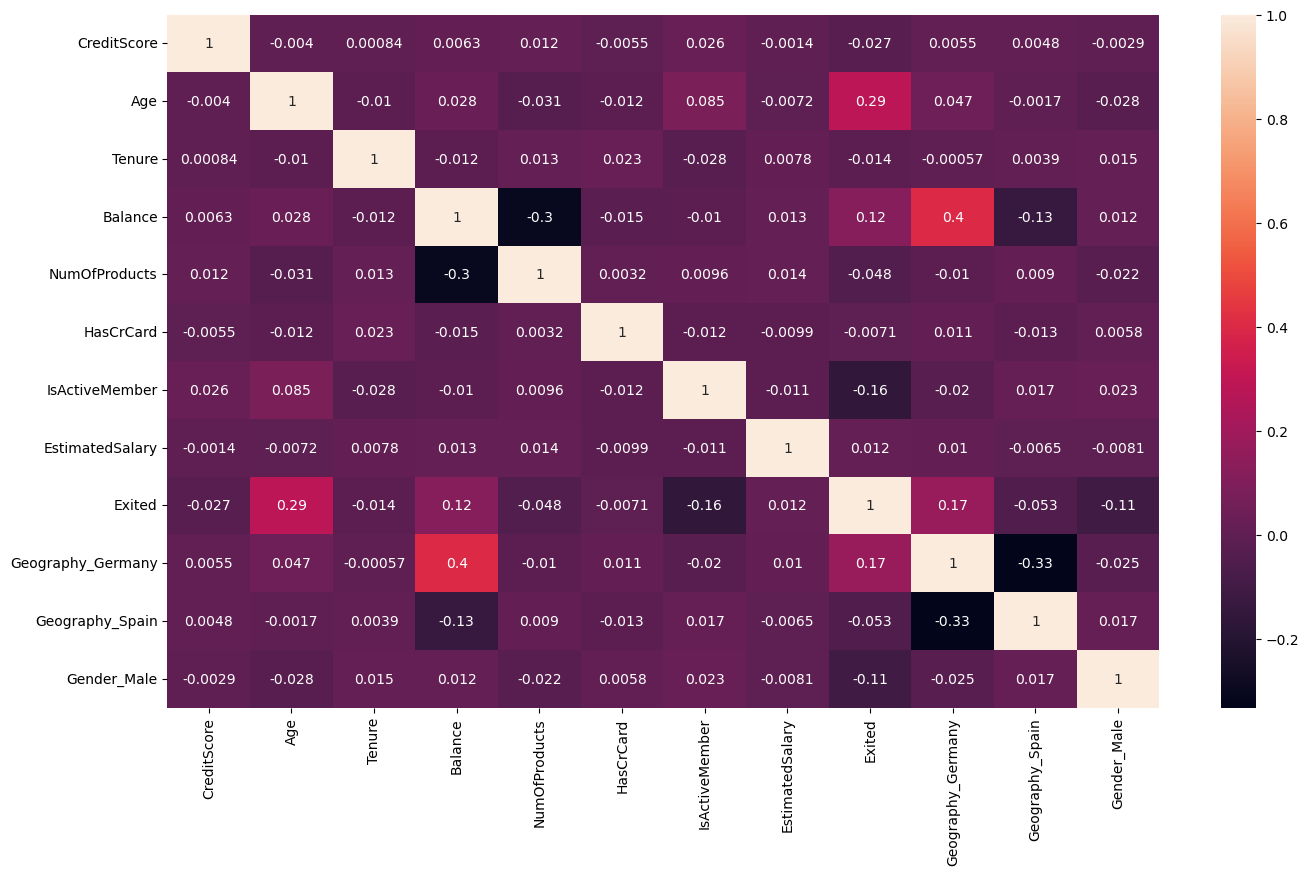

In [31]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

### Splitting the dataset

In [32]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [33]:
# independent / Matrix of feature
x = dataset.drop(columns='Exited')

In [34]:
# target/dependent variable
y = dataset['Exited']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
x_train.shape

(8000, 11)

In [38]:
x_test.shape

(2000, 11)

In [39]:
y_train.shape

(8000,)

In [40]:
y_test.shape

(2000,)

### Feature scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

In [43]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [45]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

## Part 2: Building the model

### 1) Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [47]:
y_pred = classifier_lr.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [49]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [50]:
results = pd.DataFrame([['Logistic regression', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

In [51]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [52]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 309,   96]])

### Cross validation

In [53]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)

In [54]:
accuracies

array([0.81   , 0.80375, 0.80875, 0.80875, 0.82125, 0.805  , 0.82125,
       0.79625, 0.79375, 0.815  ])

In [55]:
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.84 %
Standard Deviation is 0.88 %


### 2) Random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
y_pred = classifier_rf.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [59]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [60]:
model_results = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

In [61]:
model_results

,Model,Accuracy,F1,precision,Recall
0,Random forest,0.867,0.613372,0.745583,0.520988


In [62]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [63]:
results = results.append(model_results, ignore_index=True)

/var/folders/_t/dxxbw3ds2mvgwcby8bgjs6c00000gn/T/ipykernel_2493/711713695.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


In [64]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037
1,Random forest,0.867,0.613372,0.745583,0.520988


In [65]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


### Cross validation

In [66]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


### 3) XGBoost

Documentation:https://xgboost.readthedocs.io/en/latest/
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning

In [67]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
y_pred = classifier_xgb.predict(x_test)

In [69]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost classifier', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

results = results.append(model_results, ignore_index=True)
results

/var/folders/_t/dxxbw3ds2mvgwcby8bgjs6c00000gn/T/ipykernel_2493/1599918917.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8670,0.613372,0.745583,0.520988
2,XGBoost classifier,0.8545,0.599725,0.677019,0.538272


In [70]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1491  104]
 [ 187  218]]


### Cross validation

In [71]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.24 %
Standard Deviation is 1.22 %


## Part 3: Randomized Search to find the best parameters (XGBoost Classifier)

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
parameters = {
    'learning_rate':[0.05, 0.1, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5 , 6, 7, 8 , 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]    
}

In [74]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [75]:
randomized_search = RandomizedSearchCV(estimator=classifier_xgb, param_distributions=parameters, n_iter=5,
                                       n_jobs=-1, scoring='r2', cv=5, verbose=3)

In [76]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [77]:
randomized_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [78]:
randomized_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [79]:
randomized_search.best_score_

0.15865281628518554

## Part 4: Final Model (XGBoost Classifier)

In [82]:
from xgboost import XGBClassifier
model_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
model_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=4, max_leaves=None, min_child_weight=1, missing=None,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

In [92]:
y_pred = model_classifier.predict(x_test)

XGBoostError: [09:04:59] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/c_api/c_api_utils.h:167: Invalid missing value: null
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000120805bc8 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000012080d5ec xgboost::GetMissing(xgboost::Json const&) + 316
  [bt] (2) 3   libxgboost.dylib                    0x0000000120822a2c InplacePredictImpl(std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long long const**, unsigned long long*, float const**) + 444
  [bt] (3) 4   libxgboost.dylib                    0x0000000120823090 XGBoosterPredictFromDense + 420
  [bt] (4) 5   libffi.8.dylib                      0x0000000102dd004c ffi_call_SYSV + 76
  [bt] (5) 6   libffi.8.dylib                      0x0000000102dcd790 ffi_call_int + 1256
  [bt] (6) 7   _ctypes.cpython-39-darwin.so        0x0000000102db016c _ctypes_callproc + 772
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x0000000102daa6a8 PyCFuncPtr_call + 236
  [bt] (8) 9   python3.9                           0x00000001020dffd0 _PyObject_MakeTpCall + 136



In [85]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Final XGBoost', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1', 'precision', 'Recall'])


results = results.append(model_results, ignore_index = True)
results

/var/folders/_t/dxxbw3ds2mvgwcby8bgjs6c00000gn/T/ipykernel_2493/1033106545.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8670,0.613372,0.745583,0.520988
2,XGBoost classifier,0.8545,0.599725,0.677019,0.538272
3,Final XGBoost,0.8545,0.599725,0.677019,0.538272


In [86]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1491  104]
 [ 187  218]]


### Cross validation

In [87]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

/Users/neekhilkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/neekhilkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/neekhilkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 108, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/Users/neekhilkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/neekhilkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/neekhilkumar/opt/anac

Accuracy is nan %
Standard Deviation is nan %


## Part 5: Predicting a single observation

In [88]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [89]:
single_obs = [[625,	45,	5,	12500.01,	1,	0,	1,	101348.88, 0,	0, 1]]

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.230 total time=   0.2s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.135 total time=   0.3s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=5;, score=0.033 total time=   0.6s
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.095 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=5;, score=0.041 total time=   0.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=3;, score=0.048 total time=   0.6s
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=5;, score=0.135 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_

In [90]:
single_obs

[[625, 45, 5, 12500.01, 1, 0, 1, 101348.88, 0, 0, 1]]

In [91]:
classifier.predict(sc.transform(single_obs))

/Users/neekhilkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


XGBoostError: [09:03:18] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/c_api/c_api_utils.h:167: Invalid missing value: null
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000120805bc8 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000012080d5ec xgboost::GetMissing(xgboost::Json const&) + 316
  [bt] (2) 3   libxgboost.dylib                    0x0000000120822a2c InplacePredictImpl(std::__1::shared_ptr<xgboost::DMatrix>, char const*, xgboost::Learner*, unsigned long long const**, unsigned long long*, float const**) + 444
  [bt] (3) 4   libxgboost.dylib                    0x0000000120823090 XGBoosterPredictFromDense + 420
  [bt] (4) 5   libffi.8.dylib                      0x0000000102dd004c ffi_call_SYSV + 76
  [bt] (5) 6   libffi.8.dylib                      0x0000000102dcd790 ffi_call_int + 1256
  [bt] (6) 7   _ctypes.cpython-39-darwin.so        0x0000000102db016c _ctypes_callproc + 772
  [bt] (7) 8   _ctypes.cpython-39-darwin.so        0x0000000102daa6a8 PyCFuncPtr_call + 236
  [bt] (8) 9   python3.9                           0x00000001020dffd0 _PyObject_MakeTpCall + 136

